### Лабораторная работа №1 "Интегрирование ОДУ"

#### Задание №1
Дано уравнение 
$$\frac{dy}{dt}-t^2y=\varepsilon yt,$$     $$t\in[0,1],$$     $$y(0)=1.$$   

Необходимо найти:
1. Точное решение уравнения;
3. Численно решить методом Эйлера уравнение для $\varepsilon=2$ с шагом $\Delta t=0.1$ и шагом $\Delta t=0.01$;
4. Построить на одном рисунке графики для обоих численных решений и график точного решения при $\varepsilon=2$.

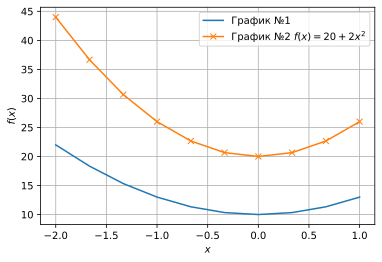

In [2]:
# Пример вывода 2х графиков на одном рисунке
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#графики встраиваются в блокнот;
%config InlineBackend.figure_format = 'svg' #векторный формат #векторный формат

def some_foo(x):
    return 10+3*x**2

xs = np.linspace(-2,1, 10)
ys = [some_foo(x) for x in xs]
plt.plot(xs, ys, label='График №1')
ys2 = [2*some_foo(x) for x in xs]
plt.plot(xs, ys2, '-x', label='График №2 $f(x)=20+2x^2$')
plt.grid(True)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

#### Задание №2
1. Разобраться с системой динамики двух материальных точек на плоскости под действием сил притяжения. Силы притяжения между точками действует вдоль соединяющей их прямой, пропорциональна обеим массам и обратно пропорциональна квадрату расстояния.
2. Привести систему ОДУ к системе ОДУ первого порядка.
4. Решить систему ОДУ методом Эйлера и при помощи модуля scipy.integrate.ode (см. [официальную справку](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html) ). Изучить метод интегрирования, который реализован в библиотеке. 
5. Построить график получившихся траекторий.

![](img.png)

$$\frac{d^2\mathbf{r}_1}{dt^2}=m_1\mathbf{F}_1$$
$$\frac{d^2\mathbf{r}_2}{dt^2}=m_2\mathbf{F}_2$$
$$|\mathbf{F}_1|=G\frac{m_1m_2}{|\mathbf{r_1-r_2}|^2}$$
$$\mathbf{F}_1=-\mathbf{F}_2$$
$$G=500$$

Начальные условия:
  - масса первой точки 1;
  - масса второй точки 1;
  - начальное положение первой точки (0, 0);
  - начальное положение второй точки (10, 0);
  - координаты вектора скорости первой точки в начальный момент времени (0, 5);
  - координаты вектора скорости второй точки в начальный момент времени (0, -5):

Остальные параметры:
  - шаг интегрирования методом эйлера $dt$=0.01;
  - время интегрирования: до $t$=3.

## В качестве примера посмотрите решение задачи внешней баллистики материальной точки в поле силы тяжести и с силой сопротивления воздуха

In [3]:
import numpy as np
from math import * #импортируем все функции

#константы для вычислений

#для перевода радиан в градусы
grad = pi/180 

g = 9.81 # -_-

# плотность выоздуха
ro = 1.240 

#скорость звука
a = 340

#закон сопротивления
def C_x(M):
    return 0.44

\begin{equation*}
\overrightarrow{Y} = 
\begin{pmatrix}
Y[0] \\
Y[1]\\
Y[2]\\
Y[3]
\end{pmatrix} 
 = 
\begin{pmatrix}
x \\
y \\
V_x \\
V_y
\end{pmatrix}
\end{equation*}


\begin{equation*}
\frac{d\overrightarrow{Y}}{dt} = \overrightarrow{f}(t,\overrightarrow{Y}) =
\begin{pmatrix}
f[0] \\
f[1] \\
f[2] \\
f[3]
\end{pmatrix} 
=
\begin{pmatrix}
\frac{dY[0]}{dt}\\
\frac{dY[1]}{dt}\\
\frac{dY[1]}{dt}\\
\frac{dY[1]}{dt}
\end{pmatrix}
=
\begin{pmatrix}
V_x \\
V_y \\
\frac{dV_x}{dt} \\
\frac{dV_y}{dt}
\end{pmatrix}
\end{equation*}

In [4]:
#начальное положение м.т.
x_0 = 0 
y_0 = 0

#начальная скорость
V_0 = 100

#начальнчй угол
thetta_0 = 30

#масса
mass = 30

#площадь миделя
S_m = pi*0.1**2/4

In [5]:
# Н.У
Y_0 = np.array([
    x_0,
    y_0,
    V_0*cos(thetta_0*grad),
    V_0*sin(thetta_0*grad)
])
Y_0

array([ 0.        ,  0.        , 86.60254038, 50.        ])

In [6]:
# Переписать немного функцию правых частей
def f(t,Y):
    x = Y[0]
    y = Y[1]
    V_x = Y[2]
    V_y = Y[3]
    thetta = atan(V_y/V_x)
    V = sqrt(V_x**2 + V_y**2)
    mach = V/a
    F_cx = ro*V**2/2*S_m*C_x(mach)
    mg = mass*g
    a_x = copysign(F_cx*cos(thetta),-V_x)/mass
    a_y = (copysign(F_cx*sin(thetta),-V_y) - mg)/mass
    return np.array([
        V_x,
        V_y,
        a_x,
        a_y
    ])

In [7]:
# переписать функцию под требования
def euler(t_0, t_1, y_0, dYdt, n_points):
    ts, dt = np.linspace(t_0,t_1,n_points, retstep=True)
    ans = []
    ans.append(y_0)
    Y_i = y_0
    for ti in ts[:-1]:
        Y_ip1 = Y_i + dt*dYdt(ti,Y_i)
        ans.append(Y_ip1)
        Y_i = Y_ip1
    return np.array(ans), ts

In [8]:
y,t = euler(0,10,Y_0,f,100)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
#графики встраиваются в блокнот;
%config InlineBackend.figure_format = 'svg' #векторный формат #векторный формат

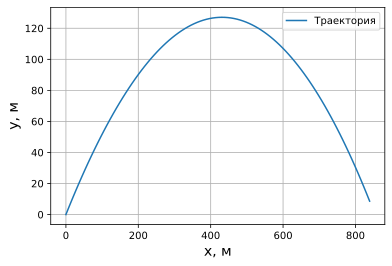

In [10]:
xs = y[:,0]
ys = y[:,1]
plt.plot(xs, ys, label='Траектория');
plt.grid() # сетка
plt.xlabel('x, м', fontsize=14)
plt.ylabel('y, м', fontsize=14)
plt.legend(loc='best');

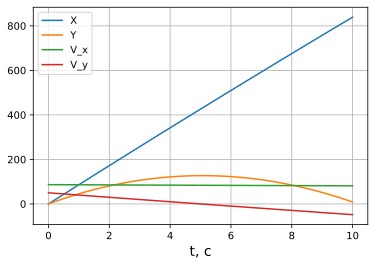

In [11]:
ts = t
xs = y[:,0]
ys = y[:,1]
Vxs = y[:,2]
Vys = y[:,3]
plt.plot(ts, xs, label='X');
plt.plot(ts, ys, label='Y');
plt.plot(ts, Vxs, label='V_x');
plt.plot(ts, Vys, label='V_y');
plt.grid() # сетка
plt.xlabel('t, c', fontsize=14)
plt.legend(loc='best')
plt.show()